In [ ]:
##Data is from the field of meterology, need to write a script to perform 
#some analysis on weather station data. 
#Given below is a file "resources/ex4.csv", which contains some precipiation data for the month of June.
#Each line in the file has the format - Date,Precipation (upto two decimal places).
#Note how the data is seperated using ','. The first row of the file contains headers and should be ignored.

#The task is to complete the getNAvg function that computes a simple moving average for N days 
#for the precipiation data, where N is a parameter. 
#The function should return a list of moving averages for the given data.

#The formula for a k day moving average over a series -  𝑛0,𝑛2,𝑛3....𝑛𝑚 is:
#𝑀𝑖=𝑀𝑖−1+𝑛𝑖−𝑛𝑖−𝑘𝑘,for i = k to m where 𝑀𝑖 is the moving average
 

In [1]:
import matplotlib.pyplot as plt

statData ="ex4.csv"

In [2]:
def getNAvg(file,N):
    """
    file - File containting all the raw weather station data
    N - The number of days to compute the moving average over
    
    Return a list of containg the moving average of all data points
    """
    row = 0 # keep track of rows
    lastN = [] # keep track of last N points
    mean = [0] # running avg


    with open(file,"r") as rawData: 
        for line in rawData:
            if (row == 0): # Ignore the headers
                row = row + 1
                continue

            line = line.strip('\n')
            lineData = float(line.split(',')[1])

            if (row<=N): 
                lastN.append(lineData)
                mean[0] = (lineData + mean[0]*(row-1))/row
            else:
                mean.append( mean[row - N -1]+ (lineData - lastN[0])/N)
                lastN = lastN[1:]
                lastN.append(lineData)

            row = row +1            
        return mean
                    
def plotData(mean,N):
        """ 
        mean - series to plot
        N - parameter for legend
        Plots running averages 
        
        """
        mean = [round(x,3) for x in mean]
        plt.plot(mean,label=str(N) + ' day average')
        plt.xlabel('Day')
        plt.ylabel('Precipiation')
        plt.legend()
       

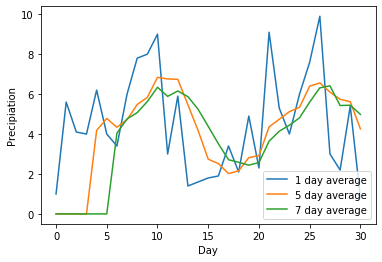

In [3]:
#
plotData(getNAvg(statData,1),1)
plotData ([0 for x in range(1,5)]+ getNAvg(statData,5),5 )
plotData([0 for x in range(1,7)] + getNAvg(statData,7),7)

In [4]:
avg5 =[4.18,4.78,4.34,4.72,5.48,5.84,6.84,6.76,6.74,5.46,4.18,2.74,2.52,2.02,2.16,2.82,2.92,4.36,4.74,5.12,5.34,6.4,6.56,6.1,5.74,5.62,4.26]
avg7 =[4.043,4.757,5.071,5.629,6.343,5.886,6.157,5.871,5.243,4.386,3.514,2.714,2.586,2.443,2.571,3.643,4.143,4.443,4.814,5.6,6.314,6.414,5.429,5.443,4.986]

def testMsg(passed):
    if passed:
       return 'Test Passed'
    else :
       return ' Test Failed'

print("getNAvg : ")
try:
    sol5 = getNAvg(statData,5)
    sol7 = getNAvg(statData,7)
    
    if(len(sol5)==len( avg5) and (len(sol7)==len(avg7))):
        err5 = sum([abs(avg5[index] - sol5[index])for index in range(len(avg5))])
        err7 = sum([abs(avg7[index] - sol7[index])for index in range(len(avg7))])
        print(testMsg((err5 < 1) and (err7 <1)))
        
    else:
        print(testMsg(false))
except NameError as e: 
    print('Error! Code: {c}, Message: {m}'.format(c = type(e).__name__, m = str(e)))
except:
    print("An error occured. Recheck your function")


getNAvg : 
Test Passed


In [6]:
file ="ex4.csv"
with open(file,"r") as rawData: 
    print(rawData.read())

Day,ONE_DAY_PRECIPITATION
2020-06-01 0:00:00,1
2020-06-02 0:00:00,5.6
2020-06-03 0:00:00,4.1
2020-06-04 0:00:00,4
2020-06-05 0:00:00,6.2
2020-06-06 0:00:00,4
2020-06-07 0:00:00,3.4
2020-06-08 0:00:00,6
2020-06-09 0:00:00,7.8
2020-06-10 0:00:00,8
2020-06-11 0:00:00,9
2020-06-12 0:00:00,3
2020-06-13 0:00:00,5.9
2020-06-14 0:00:00,1.4
2020-06-15 0:00:00,1.6
2020-06-16 0:00:00,1.8
2020-06-17 0:00:00,1.9
2020-06-18 0:00:00,3.4
2020-06-19 0:00:00,2.1
2020-06-20 0:00:00,4.9
2020-06-21 0:00:00,2.3
2020-06-22 0:00:00,9.1
2020-06-23 0:00:00,5.3
2020-06-24 0:00:00,4
2020-06-25 0:00:00,6
2020-06-26 0:00:00,7.6
2020-06-27 0:00:00,9.9
2020-06-28 0:00:00,3
2020-06-29 0:00:00,2.2
2020-06-30 0:00:00,5.4
2020-07-01 0:00:00,0.8
